In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:12<00:00, 136MB/s]
100% 1.06G/1.06G [00:12<00:00, 93.1MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [7]:
import tensorflow as tf
from tensorflow import keras

In [12]:
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [19]:
from tensorflow.keras.layers import BatchNormalization,Dropout

In [20]:
train_ds=keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.


In [21]:
valid_ds=keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)

Found 5000 files belonging to 2 classes.


In [22]:
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

  train_ds=train_ds.map(process)
  valid_ds=valid_ds.map(process)

In [26]:
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [27]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_9 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_10 (Ba  (None, 125, 125, 64)      256       
 tchNormalization)                                               
                                                      

In [28]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [30]:
history=model.fit(train_ds,epochs=10,validation_data=valid_ds)

Epoch 1/10
625/625 [==============================] - 66s 106ms/step - loss: 0.6577 - accuracy: 0.6149 - val_loss: 0.6796 - val_accuracy: 0.6036
Epoch 2/10
625/625 [==============================] - 64s 102ms/step - loss: 0.6263 - accuracy: 0.6615 - val_loss: 0.6336 - val_accuracy: 0.6628
Epoch 3/10
625/625 [==============================] - 65s 103ms/step - loss: 0.5667 - accuracy: 0.7093 - val_loss: 0.5630 - val_accuracy: 0.7040
Epoch 4/10
625/625 [==============================] - 67s 107ms/step - loss: 0.5236 - accuracy: 0.7408 - val_loss: 0.5429 - val_accuracy: 0.7370
Epoch 5/10
625/625 [==============================] - 64s 102ms/step - loss: 0.4699 - accuracy: 0.7712 - val_loss: 0.5399 - val_accuracy: 0.7400
Epoch 6/10
625/625 [==============================] - 65s 104ms/step - loss: 0.4132 - accuracy: 0.7954 - val_loss: 0.4677 - val_accuracy: 0.7820
Epoch 7/10
625/625 [==============================] - 65s 104ms/step - loss: 0.3579 - accuracy: 0.8197 - val_loss: 0.4273 - val_ac

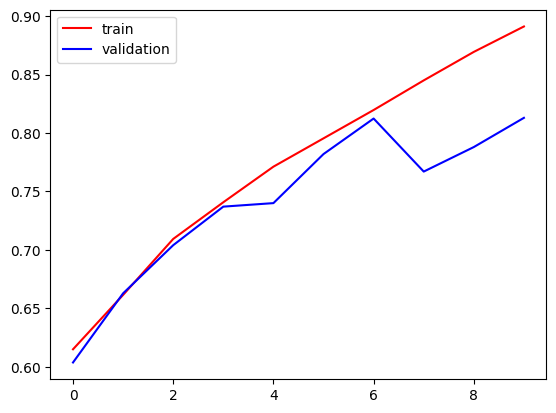

In [33]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()


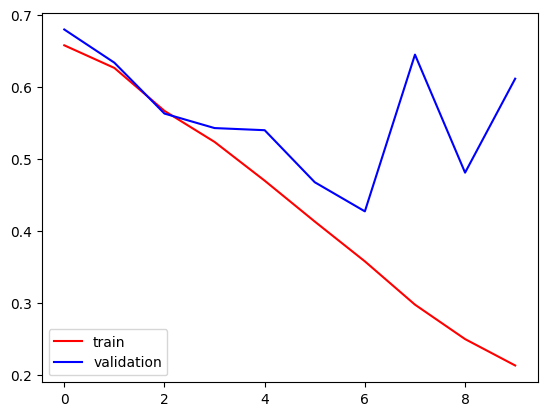

In [34]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [35]:
import cv2

In [42]:
test_img=cv2.imread('/content/Cat2.jpg')

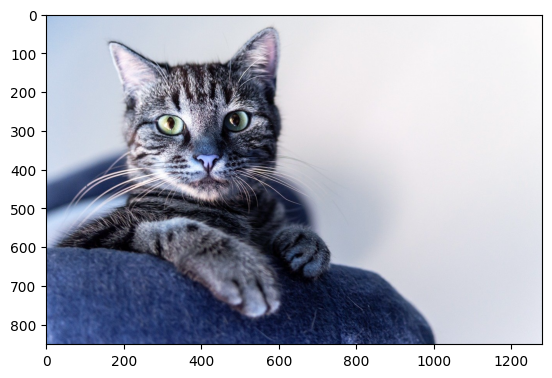

In [43]:
plt.imshow(test_img)

In [44]:
test_img.shape

(851, 1280, 3)

In [45]:
test_img=cv2.resize(test_img,(256,256))

In [46]:
test_input=test_img.reshape((1,256,256,3))

In [47]:
model.predict(test_input)

1/1 [==============================] - 0s 18ms/step


array([[0.00047348]], dtype=float32)